<h1><center> Example Collaborative non-parametric two-sample testing </center></h1>

The goal of this jupyter notebook is to illustrate how to use C2ST algorithm described in the paper <strong> "Collaborative two-sample testing"</strong>. We include as well a description on how to use GRULSIF. 

In [1]:
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import norm,uniform

In [2]:
from Models.collaborative_two_sample_test import *
from Models.two_sample_test_univariate_models import *
from Experiments.experiments_two_sample_test import *
from Models.likelihood_ratio_collaborative import *
from Models.likelihood_ratio_univariate import *

In [3]:
import pandas as pd
import scipy

# Experiment I.

**Experiment: Synth.Ia**

- **Feature space**: $\mathbb{R}^1$
- **Graph**: Stochastic Block Model (SBM) with 4 clusters, 25 nodes each.

| Location | $p_v$ | vs. | $q_v$ |
|----------|----------------|----------|----------------|
| $v \in C_1$ | $\mathcal{N}(\mu=0, \sigma=1)$ | vs.| $\text{Uniform}(-\sqrt{3}, \sqrt{3})$ |
| $v \in C_2 \cup C_3$ | $\mathcal{N}(\mu=0, \sigma=1)$| vs. | $\bullet$ |
| $v \in C_4$ | $\mathcal{N}(\mu=0, \sigma=1)$ | vs. | $\mathcal{N}(\mu=1, \sigma=\bullet)$ |

#### Data at nodes

In [4]:
N_ref=200##### Number of observations for p_v
N_test=200######## Number of observations for q_v

In [5]:
G,data_ref,data_test,affected_nodes=generate_experiment_1(N_ref,N_test)     

#### Graph structure

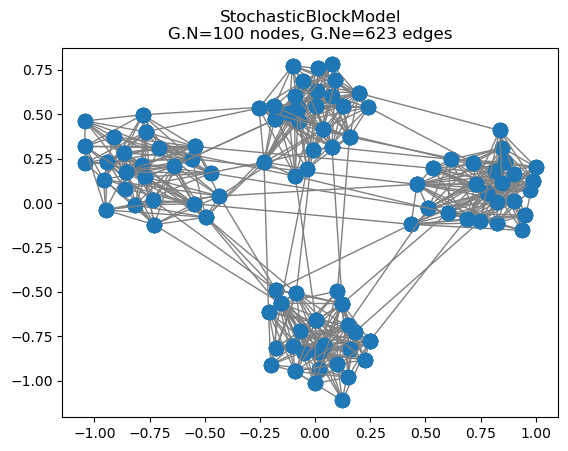

In [6]:
G.set_coordinates()
G.plot()

#### Data distribution in nodes where p_v is different from p'_v.

Text(0.5, 1.0, 'q_v for nodes in cluster C_2')

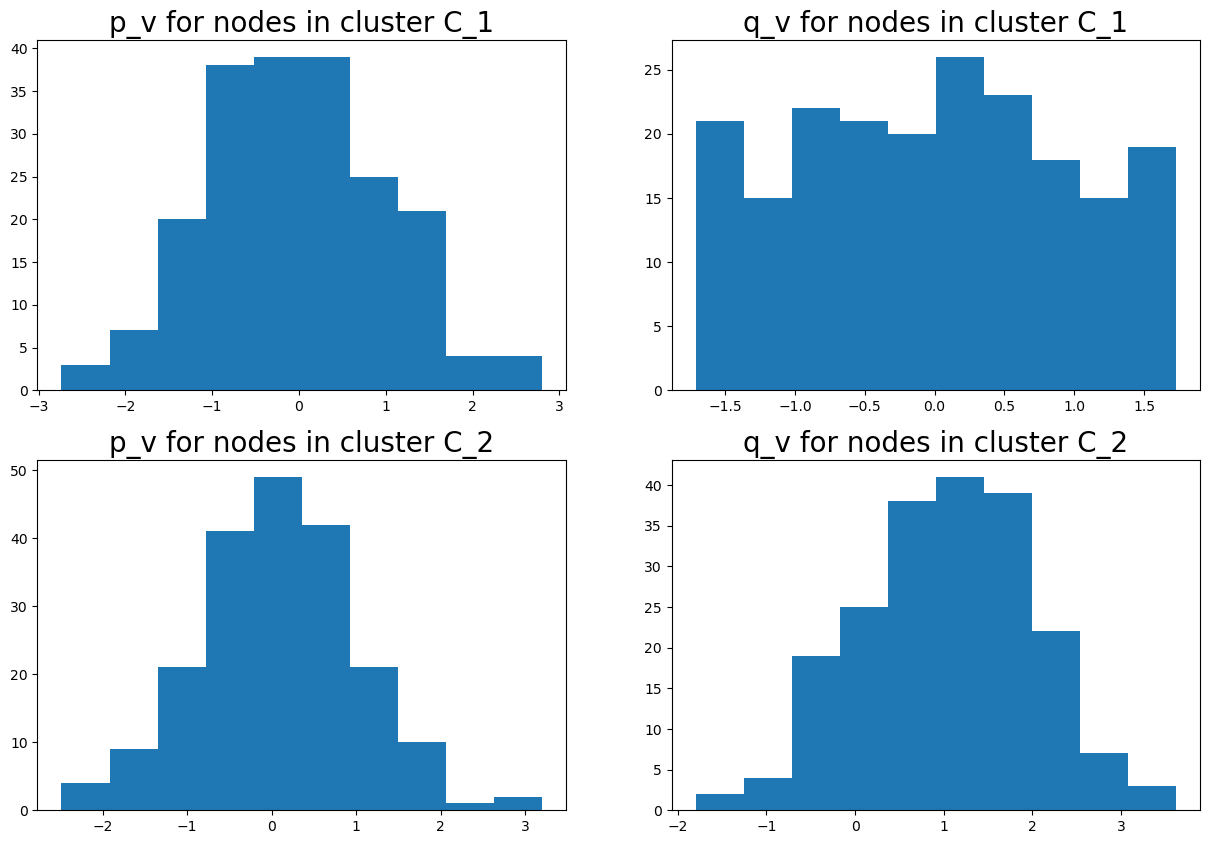

In [7]:
fig,ax=plt.subplots(2,2,figsize=(15, 10))
ax[0,0].hist(data_ref[0])
ax[0,0].set_title('p_v for nodes in cluster C_1', fontsize=20)
ax[0,1].hist(data_test[0])
ax[0,1].set_title("q_v for nodes in cluster C_1", fontsize=20)
ax[1,0].hist(data_ref[75])
ax[1,0].set_title('p_v for nodes in cluster C_2', fontsize=20)
ax[1,1].hist(data_test[75])
ax[1,1].set_title("q_v for nodes in cluster C_2", fontsize=20)

## C2ST integrating the network topology.  

In [8]:
alpha=0.1
threshold_coherence=0.3
c2st=C2ST(G.W,data_ref,data_test,threshold_coherence=threshold_coherence,alpha=alpha,verbose=True,tol=1e-2)
p_1_c2st,p_2_c2st=c2st.get_pivalues(n_rounds=1000)

dictionary size::6
sigma::0.6,lambda:7.071067811865476e-08,gamma:7.071067811865476e-08,score:-0.5884
sigma::0.6,lambda:7.071067811865476e-08,gamma:7.071067811865475e-06,score:-0.5888
sigma::0.6,lambda:7.071067811865476e-08,gamma:0.0007071067811865475,score:-0.5561
sigma::0.6,lambda:7.071067811865476e-08,gamma:0.07071067811865475,score:-0.0595
sigma::0.6,lambda:3.9763536438352535e-06,gamma:7.071067811865476e-08,score:-0.5885
sigma::0.6,lambda:3.9763536438352535e-06,gamma:7.071067811865475e-06,score:-0.5886
sigma::0.6,lambda:3.9763536438352535e-06,gamma:0.0007071067811865475,score:-0.5581
sigma::0.6,lambda:3.9763536438352535e-06,gamma:0.07071067811865475,score:-0.0595
sigma::0.6,lambda:0.00022360679774997895,gamma:7.071067811865476e-08,score:-0.6016
sigma::0.6,lambda:0.00022360679774997895,gamma:7.071067811865475e-06,score:-0.6015
sigma::0.6,lambda:0.00022360679774997895,gamma:0.0007071067811865475,score:-0.5574
sigma::0.6,lambda:0.00022360679774997895,gamma:0.07071067811865475,score:-0.

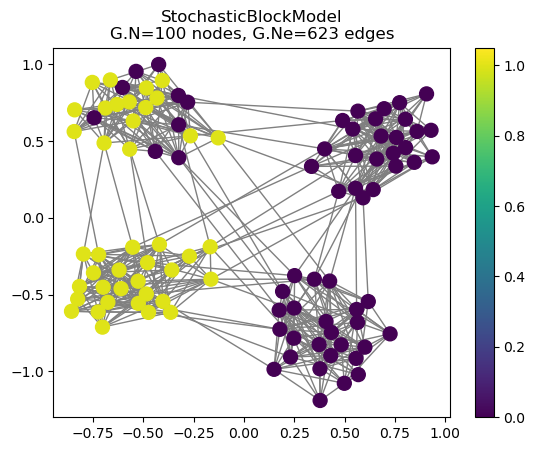

In [9]:
##### We show the nodes whose null hypothesis is rejected at level 0.05. 
n_nodes=100
G.set_coordinates()
index_nodes_pq=np.where(p_1_c2st<0.025)
index_nodes_qp=np.where(p_2_c2st<0.025)
significant_nodes=np.zeros(n_nodes)
significant_nodes[index_nodes_pq]=1
significant_nodes[index_nodes_qp]=1
G.plot_signal(significant_nodes)

## Pool ignoring the network topology.  

In [10]:
alpha=0.1
threshold_coherence=0.1
pool_tst=Pool_two_sample_test(data_ref, data_test, threshold_coherence=threshold_coherence,  alpha=alpha, tol=1e-2, verbose=True)
p_1_pool,p_2_pool=pool_tst.get_pivalues(n_rounds=1000)

dictionary size::4
sigma::0.6,gamma:7.071067811865476e-07,score:-0.6015
sigma::0.6,gamma:7.071067811865475e-05,score:-0.5981
sigma::0.6,gamma:0.007071067811865475,score:-0.3247
sigma::0.6,gamma:0.7071067811865475,score:-0.0064
dictionary size::5
sigma::0.8,gamma:7.071067811865476e-07,score:-0.6066
sigma::0.8,gamma:7.071067811865475e-05,score:-0.6037
sigma::0.8,gamma:0.007071067811865475,score:-0.2972
sigma::0.8,gamma:0.7071067811865475,score:-0.0053
dictionary size::5
sigma::1.0,gamma:7.071067811865476e-07,score:-0.6003
sigma::1.0,gamma:7.071067811865475e-05,score:-0.5962
sigma::1.0,gamma:0.007071067811865475,score:-0.2692
sigma::1.0,gamma:0.7071067811865475,score:-0.0045
dictionary size::6
sigma::1.2,gamma:7.071067811865476e-07,score:-0.5861
sigma::1.2,gamma:7.071067811865475e-05,score:-0.5847
sigma::1.2,gamma:0.007071067811865475,score:-0.2467
sigma::1.2,gamma:0.7071067811865475,score:-0.0039
dictionary size::6
sigma::1.4,gamma:7.071067811865476e-07,score:-0.5750
sigma::1.4,gamma:7.0

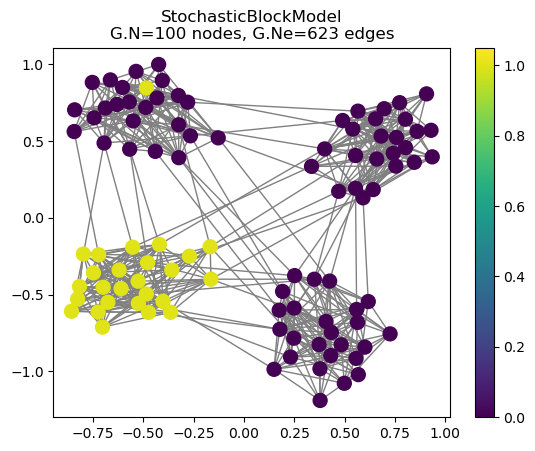

In [11]:
##### We show the nodes whose null hypothesis is rejected at level 0.05. 
n_nodes=100
index_nodes_pq=np.where(p_1_pool<0.025)
index_nodes_qp=np.where(p_2_pool<0.025)
significant_nodes=np.zeros(n_nodes)
significant_nodes[index_nodes_pq]=1
significant_nodes[index_nodes_qp]=1
G.plot_signal(significant_nodes)

## Two-sample test, univariate models

### RULISF 

In [12]:
alpha=0.1
threshold_coherence=0.1
rulsif=RULSIF_two_sample_test(data_ref,data_test,alpha=alpha)
p_1_rulsif,p_2_rulsif=rulsif.get_pivalues(n_rounds=1000)

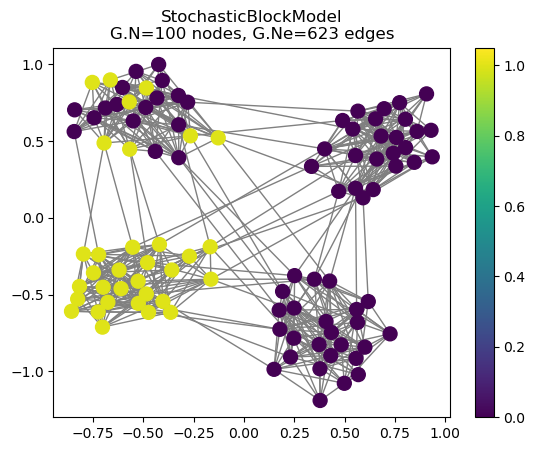

In [13]:
##### We show the nodes whose null hypothesis is rejected at level 0.05. 
n_nodes=100
index_nodes_pq=np.where(p_1_rulsif<0.025)
index_nodes_qp=np.where(p_2_rulsif<0.025)
significant_nodes=np.zeros(n_nodes)
significant_nodes[index_nodes_pq]=1
significant_nodes[index_nodes_qp]=1
G.plot_signal(significant_nodes)

### LSTT

In [14]:
alpha=0.1
threshold_coherence=0.1
lstt=LSTT(data_ref,data_test)
p_1_lstt,p_2_lstt=lstt.get_pivalues(n_rounds=1000)

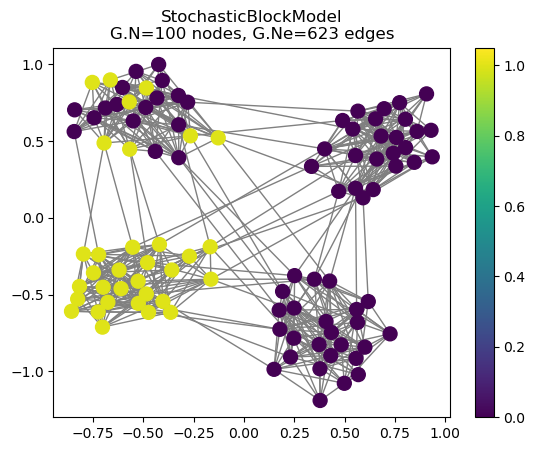

In [15]:
##### We show the nodes whose null hypothesis is rejected at level 0.05
n_nodes=100
index_nodes_pq=np.where(p_1_lstt<0.025)
index_nodes_qp=np.where(p_2_lstt<0.025)
significant_nodes=np.zeros(n_nodes)
significant_nodes[index_nodes_pq]=1
significant_nodes[index_nodes_qp]=1
G.plot_signal(significant_nodes)

### Kliep

In [16]:
threshold_coherence=0.1
kliep=KLIEP_two_sample_test(data_ref,data_test,lr=1e-4,tol=1e-3)
p_1_kliep,p_2_kliep=kliep.get_pivalues(n_rounds=1000)

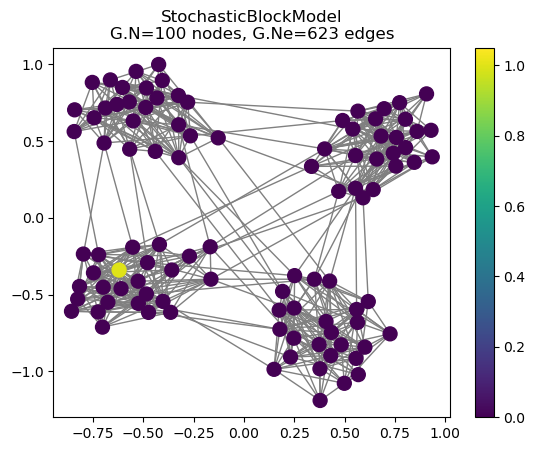

In [17]:
##### We show the nodes whose null hypothesis is rejected. 
n_nodes=100
index_nodes_pq=np.where(p_1_kliep<0.025)
index_nodes_qp=np.where(p_2_kliep<0.025)
significant_nodes=np.zeros(n_nodes)
significant_nodes[index_nodes_pq]=1
significant_nodes[index_nodes_qp]=1
G.plot_signal(significant_nodes)

### MMD with with value fixed via the median heuristic

In [18]:
mmd_median=MMD_two_sample_test(data_ref,data_test,estimate_sigma=False)
p_mmd_median=mmd_median.get_pivalues_multiprocessing(n_rounds=1000)

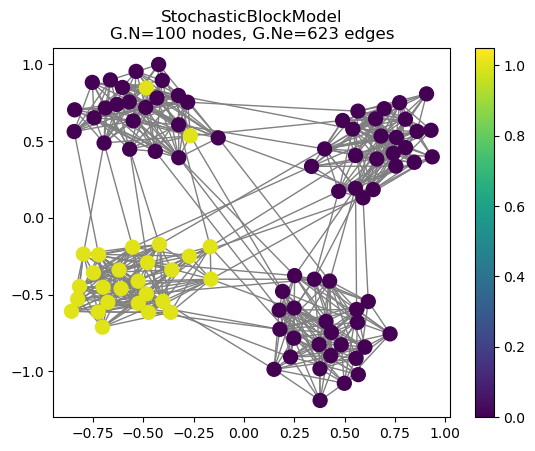

In [19]:
##### We show the nodes whose null hypothesis is rejected at level 0.05
n_nodes=100
index_nodes_pq=np.where(p_mmd_median<0.05)
significant_nodes=np.zeros(n_nodes)
significant_nodes[index_nodes_pq]=1
G.plot_signal(significant_nodes)

### MMD with with value fixed as described in Sutherland et al. (2017).

In [20]:
mmd_max=MMD_two_sample_test(data_ref,data_test,estimate_sigma=True)
p_mmd_max=mmd_max.get_pivalues_multiprocessing(n_rounds=1000)

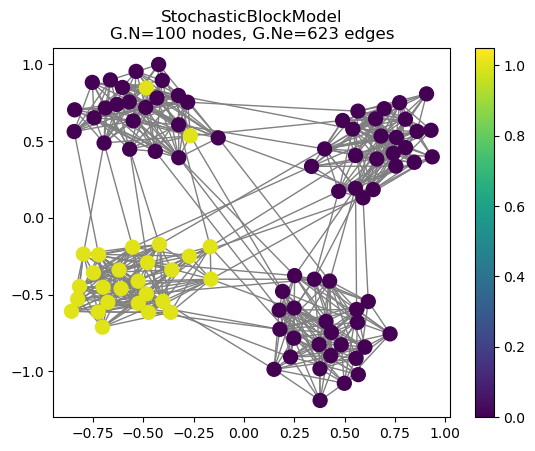

In [21]:
##### We show the nodes whose null hypothesis is rejected at level 0.05
n_nodes=100
index_nodes_pq=np.where(p_mmd_max<0.05)
significant_nodes=np.zeros(n_nodes)
significant_nodes[index_nodes_pq]=1
G.plot_signal(significant_nodes)